In [39]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wave

In [88]:
rate = 44100
duration = 2
n = np.array([-9, -7, -5, -4, -2, 0, 2])
frequencies = 440 * np.power(2 ** (1/12), n)
frequencies

array([261.6255653 , 293.66476792, 329.62755691, 349.22823143,
       391.99543598, 440.        , 493.88330126])

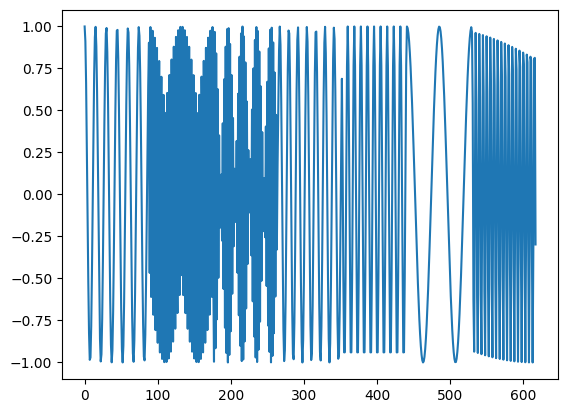

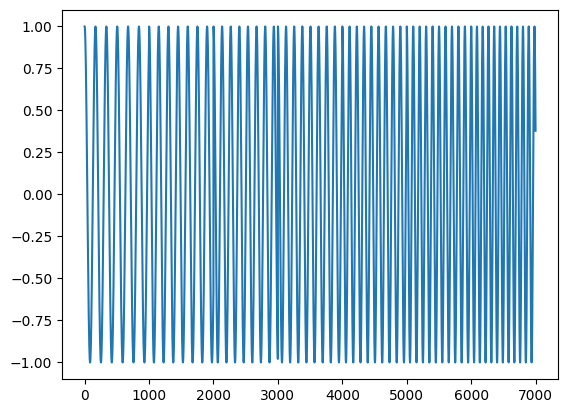

In [89]:
notes = []
notes_for_visual = []
for freq in frequencies:
    note = np.cos(2 * np.pi * freq * np.linspace(0, duration, duration * rate))
    notes.append(note)
    notes_for_visual.append(note[:1000])
plt.plot(np.concatenate(notes)[::1000])
plt.show()
plt.plot(np.concatenate(notes_for_visual))
plt.show()
wave.write('test.wav', rate, np.concatenate(notes))

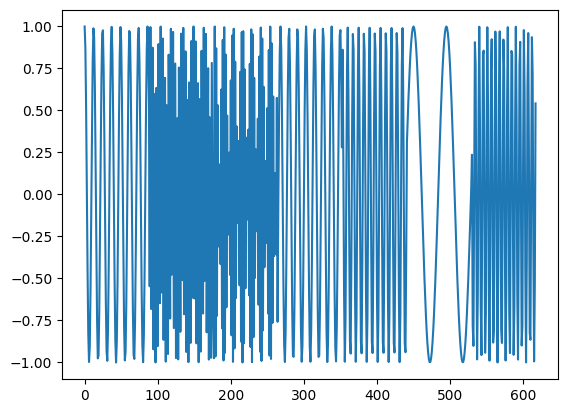

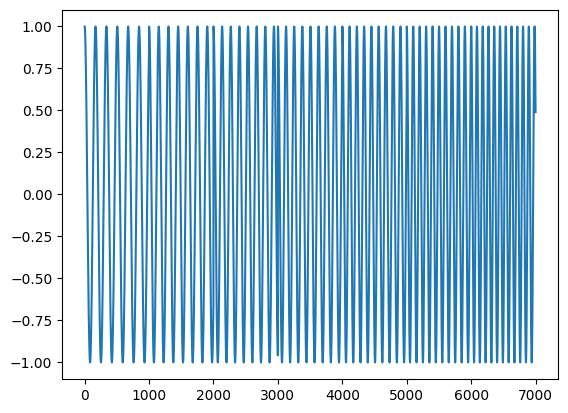

In [94]:
notes = []
notes_for_visual = []
for freq in frequencies:
    spectre = np.zeros(int(rate / 2))
    spectre[int(freq)] = rate / 2
    note = np.fft.irfft(spectre)
    notes.append(np.tile(note, duration))
    notes_for_visual.append(note[:1000])
plt.plot(np.concatenate(notes)[::1000])
plt.show()
plt.plot(np.concatenate(notes_for_visual))
plt.show()
wave.write('test2.wav', rate, np.concatenate(notes))